In [1]:
# Importing pandas
import pandas as pd
import matplotlib.pyplot as plt

# Reading the data set
df = pd.read_csv("cookie_cats.csv")

# Showing the first few rows
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [2]:
# Number of unique player
df["userid"].nunique()

90189

In [3]:
# Counting the number of players in each A/B group.
df.groupby("version")[["userid"]].nunique()

,userid
version,
gate_30,44700
gate_40,45489


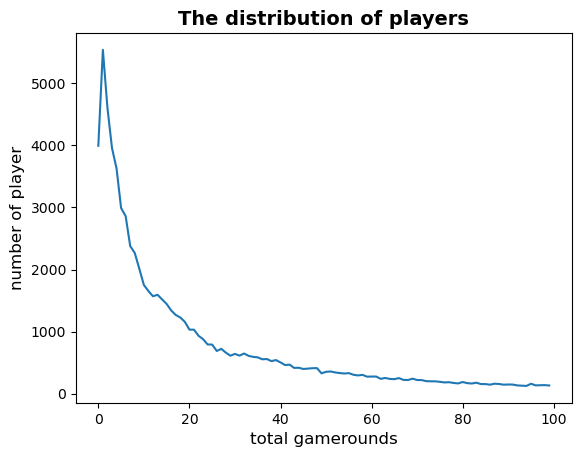

In [4]:
# Counting the number of players for each number of gamerounds 
plot_df = df.groupby("sum_gamerounds")["userid"].count()

# Plotting the distribution of players that played 0 to 100 game rounds
ax = plot_df.head(100).plot()
plt.title("The distribution of players", fontweight="bold", size=14)
plt.xlabel("total gamerounds", size=12)
plt.ylabel("number of player", size=12)
plt.show()

In [5]:
df_retention = df[["retention_1","retention_7"]].mean()*100
print(f"1-day retention ratio: {round(df_retention[0],2)}% \
      \n7-days retention ratio: {round(df_retention[1],2)}%")

1-day retention ratio: 44.52%       
7-days retention ratio: 18.61%


So, a little less than half of the players come back one day after installing the game. 18 percent of the players come back 7 day after installing the game.

In [6]:
# Calculating 1-day and 7-days retention for each A/B group
df_retention_ab = df.groupby("version").agg({"userid":"count", "retention_1":"mean","retention_7":"mean", "sum_gamerounds":"sum"})
df_retention_ab

,userid,retention_1,retention_7,sum_gamerounds
version,,,,
gate_30,44700,0.448188,0.190201,2344795
gate_40,45489,0.442283,0.182000,2333530


In [19]:
import pandas as pd
from scipy.stats import chi2_contingency


# Create DataFrame
df = pd.DataFrame(data)

# Calculate retention rates
retention_rates = df.groupby('version').agg({'retention_1': 'mean', 'retention_7': 'mean'}).reset_index()

# Perform chi-square test for retention rates
chi2_1, p_value_1, _, _ = chi2_contingency(retention_rates[['retention_1']].values)
chi2_7, p_value_7, _, _ = chi2_contingency(retention_rates[['retention_7']].values)

# Print p-values
print("1-day retention p-value:", p_value_1)
print("7-day retention p-value:", p_value_7)

1-day retention p-value: 1.0
7-day retention p-value: 1.0


A p-value of 1.0 means that there is no statistical evidence to reject the null hypothesis. 

# Testing Steps:

Creating 500 samples of dataset (bootstraping)

Calculating 1-day & 7-days retentions for A/B groups

Plotting the bootstrap distributions

Calculating retention rate difference between the two A/B groups

Calculating the probability that 1-day & 7-days retentions are greater when the gate is at level 30

Evaluating results and making recommendation

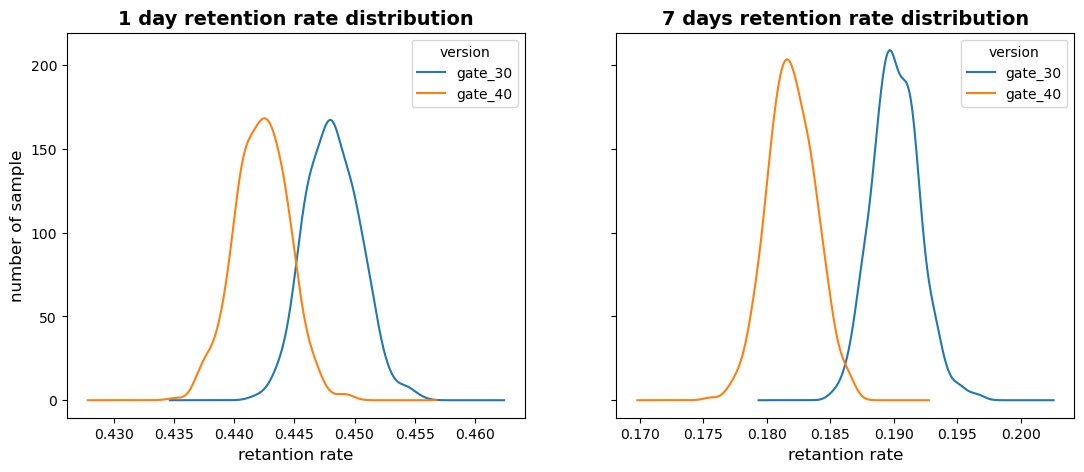

In [7]:
# Creating an list with bootstrapped means for each A/B group
boot_1d = []
boot_7d = []
for i in range(500):
    boot_mean_1 = df.sample(frac=1, replace=True).groupby('version')['retention_1'].mean()
    boot_mean_7 = df.sample(frac=1, replace=True).groupby('version')['retention_7'].mean()
    boot_1d.append(boot_mean_1)
    boot_7d.append(boot_mean_7)
    
# Transforming the list to a DataFrame
boot_1d = pd.DataFrame(boot_1d)
boot_7d = pd.DataFrame(boot_7d)

# Kernel Density Estimate plot of the bootstrap distributions
fig, (ax1,ax2) = plt.subplots(1, 2, sharey=True, figsize=(13,5))

boot_1d.plot.kde(ax=ax1)
ax1.set_xlabel("retantion rate",size=12)
ax1.set_ylabel("number of sample",size=12)
ax1.set_title("1 day retention rate distribution", fontweight="bold",size=14)

boot_7d.plot.kde(ax=ax2)
ax2.set_xlabel("retantion rate",size=12)
ax2.set_title("7 days retention rate distribution", fontweight="bold",size=14)
plt.show()

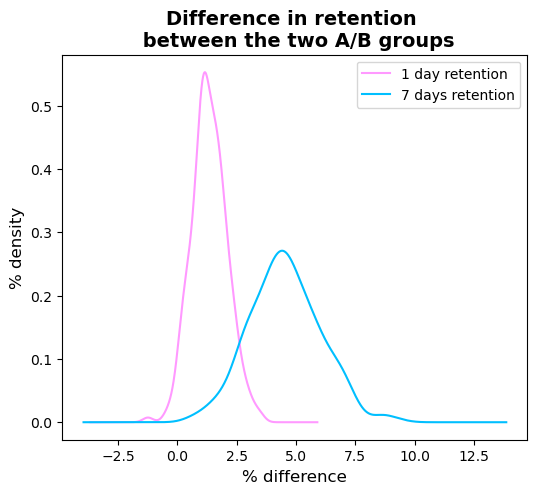

In [9]:
# Adding a column with the % difference between the two A/B groups
boot_1d['diff'] = ((boot_1d['gate_30'] - boot_1d['gate_40']) / boot_1d['gate_40'] * 100)
boot_7d['diff'] = ((boot_7d['gate_30'] - boot_7d['gate_40']) / boot_7d['gate_40'] * 100)

# Ploting the bootstrap % difference
fig, (ax1) = plt.subplots(1, 1,figsize=(6,5))

boot_1d['diff'].plot.kde(ax=ax1, c="#ff99ff", label = "1 day retention")
boot_7d['diff'].plot.kde(ax=ax1, c= "#00bfff", label = "7 days retention")
ax1.set_xlabel("% difference",size=12)
ax1.set_ylabel("% density",size=12)
ax1.set_title("Difference in retention \n between the two A/B groups", fontweight="bold", size=14)
plt.legend()
plt.show()

In [8]:
boot_1d

version,gate_30,gate_40
retention_1,0.448873,0.442500
retention_1,0.446576,0.441113
retention_1,0.446119,0.444956
retention_1,0.447361,0.437641
retention_1,0.447318,0.443027
...,...,...
retention_1,0.441582,0.440392
retention_1,0.448514,0.441719
retention_1,0.447600,0.441400
retention_1,0.446121,0.445001


In [10]:
# Calculating the probability that 1-day retention is greater when the gate is at level 30
prob_1 = (boot_1d['diff']>0).sum()/len(boot_1d['diff'])

# Calculating the probability that 7-days retention is greater when the gate is at level 30
prob_7 = (boot_7d['diff']>0).sum()/len(boot_7d['diff'])

# Pretty printing the probability
print(f"The probability that 1-day retention is greater when the gate is at level 30: {round(prob_1,2)*100}% \
      \nThe probability that 7-days retention is greater when the gate is at level 30: {(prob_7)*100}% ")

The probability that 1-day retention is greater when the gate is at level 30: 97.0%       
The probability that 7-days retention is greater when the gate is at level 30: 100.0% 


The bootstrap result tells us that there is strong evidence 97% probability that 7-day retention is higher when the gate is at level 30 than when it is at level 40.

The conclusion is: If we want to keep retention high — both 1-day and 7-day retention — we should not move the gate from level 30 to level 40. There are, of course, other metrics we could look at, like the number of game rounds played or how much in-game purchases are made by the two AB-groups. But retention is one of the most important metrics.